# Clustering Based on Neural Networks in Wireless Sensor Networks

## 1. Using Random Points and Clustering with KMeans 

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean

In [3]:
# Generate random nodes for wsn
# We will assume that these points give out signals to the nodes

x1 = 10*np.random.rand(100,2)
print("x1 shape is",x1.shape)
print(x1)
# np.savetxt("rand_dataset.csv",x1,delimiter=",")

x1 shape is (100, 2)
[[3.47438651 4.16926413]
 [8.31243308 5.96978629]
 [7.40132007 0.82998411]
 [3.88813294 0.93992914]
 [1.9323937  8.8919048 ]
 [3.53862097 2.76502481]
 [8.88141067 8.07662544]
 [6.52122703 5.89509852]
 [8.67815656 0.53729274]
 [8.99662626 7.34921093]
 [4.66374433 5.73188733]
 [4.5670048  7.38753486]
 [2.97524157 4.26208166]
 [9.71777221 0.08856294]
 [8.58339922 7.02631252]
 [1.04667699 0.56458844]
 [4.49874219 7.45250397]
 [8.39236129 7.90280259]
 [6.13906276 0.73347843]
 [7.4930344  6.7851425 ]
 [8.35713659 3.67873394]
 [5.91450317 6.788747  ]
 [2.67043337 8.45098872]
 [5.88687077 1.44072915]
 [5.37875288 6.48526251]
 [7.47692867 0.29506686]
 [7.47767035 9.37811725]
 [5.32183364 5.0852391 ]
 [8.92043753 5.72158669]
 [3.10691483 1.51811689]
 [9.23138016 5.25467614]
 [1.41091001 4.09194572]
 [8.09515603 2.73116294]
 [9.32531689 4.22634633]
 [4.69550313 7.29598412]
 [6.9391296  5.78386661]
 [6.70323596 7.89467251]
 [3.98521323 0.67550729]
 [0.95254979 9.74488116]
 [2.

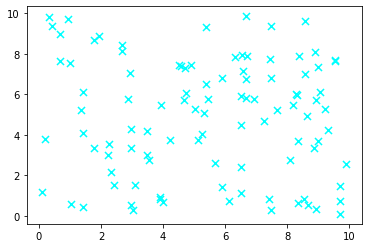

In [4]:
plt.scatter(
    x1[:,0],x1[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

In [5]:
#Here let us take 4 main nodes to which the signals are sent 
kmean = KMeans(n_clusters=3)
km = kmean
kmean.fit(x1) #Fitting our clusters using KMeans Algorithm

KMeans(n_clusters=3)

In [6]:
kmean.cluster_centers_

array([[7.68074262, 6.38329267],
       [5.21985566, 1.54837402],
       [2.52887664, 6.67101352]])

In [7]:
y_km = kmean.labels_

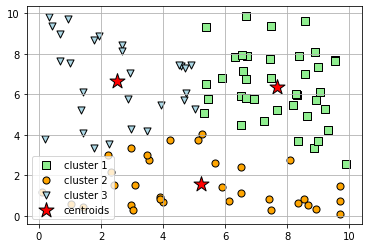

In [8]:
plt.scatter(
    x1[y_km == 0, 0], x1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x1[y_km == 1, 0], x1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x1[y_km == 2, 0], x1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

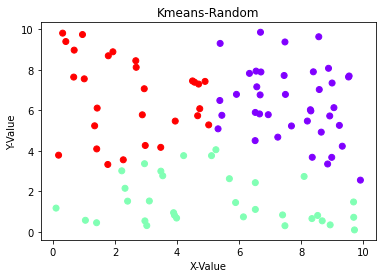

In [9]:
plt.scatter(x1[:,0],x1[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Random")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("kmeans_rand.jpg")
# plt.legend()  

Cluster 1 Inertia 1630.0045993547958
Cluster 2 Inertia 1011.7253178213632
Cluster 3 Inertia 650.735537631141
Cluster 4 Inertia 382.2331089019546
Cluster 5 Inertia 297.29193408469706
Cluster 6 Inertia 242.96945782454947
Cluster 7 Inertia 200.27094706992742
Cluster 8 Inertia 175.7041733138657
Cluster 9 Inertia 153.37461324623095
Cluster 10 Inertia 136.13851266882926
Cluster 11 Inertia 122.43250014317722
Cluster 12 Inertia 112.23925426673236
Cluster 13 Inertia 100.74988769174351
Cluster 14 Inertia 90.6388820323892
Cluster 15 Inertia 77.94840462595302
Cluster 16 Inertia 71.8612118227082
Cluster 17 Inertia 67.30201635418655
Cluster 18 Inertia 60.3658711779115
Cluster 19 Inertia 54.76502098088454


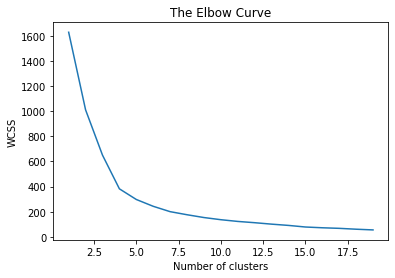

In [10]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x1)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

- The above plot tells us that 3 clusters are not appropriate enough due to the elbow forming after 3 and somewhere around 5 and the improvement becomes very less there after. So we need more nodes.

## Analysing Performance (Energy)


### 1. Finding Energy with Clustering

In [39]:
# assuming base station at point B(-6,6)
B = [5.0,5.0,10.0]
B = np.array(B)

In [17]:
# calculating distances of cluster nodes with cluster heads
X=x1
km.cluster_centers_

array([[7.68074262, 6.38329267],
       [5.21985566, 1.54837402],
       [2.52887664, 6.67101352]])

In [18]:
def calcdist(heads,points,y_clust):
    # print(heads)
    # print(heads[0])
    num_heads = heads.size // 2
    num_points = points.size //2
    dist = []
    for i in range(num_points):
        y_c = y_clust[i]
        head = heads[y_c]
        # print(head,y_c,points[i])
        dist.append(euclidean(points[i],head))
    return dist

In [21]:
# Calculating Distances from Cluster Heads
node_distances = []
node_distances = calcdist(km.cluster_centers_,X,y_km)
node_distances
        


[2.674460497453929,
 0.7549969295771568,
 2.2967087443660055,
 1.4641347526166004,
 2.299597781690085,
 2.0752805183112657,
 2.0758081899957626,
 1.2580977517638747,
 3.6030723716235062,
 1.6323442764453706,
 2.3322988806644096,
 2.160409503416941,
 2.449937622370368,
 4.728879538083067,
 1.1082704814638773,
 4.287569742200258,
 2.1192209930326844,
 1.6778890071445518,
 1.2284121944652813,
 0.44352864792148744,
 2.7878570159017033,
 1.8121796366240335,
 1.7855951375940655,
 0.6756453060118556,
 2.3042470823851486,
 2.5816966122523497,
 3.0017016177577025,
 2.6924700000331807,
 1.4052395779460065,
 2.113157460613924,
 1.917876961333405,
 2.8109500455963277,
 3.109074116001391,
 2.712386776667503,
 2.254963096134222,
 0.9535730110619157,
 1.7999411910036562,
 1.5120311678461054,
 3.4544852851089303,
 3.127930560645102,
 1.855706521456159,
 1.0507228572168703,
 1.3560355687127925,
 3.4328441533129217,
 1.1689527207489225,
 4.434719567321922,
 1.3572603303943345,
 2.9576305258570064,
 3.72

In [46]:
head_distances = []
for i in range(km.cluster_centers_.size//2):
    temp_point = km.cluster_centers_[i]
    temp_point = np.append(temp_point,[0.0])
    print(temp_point)
    dist = euclidean(temp_point,B)
    mult = y_km[y_km==i].size
    head_distances.append(dist*mult*0.70)

head_distances

[7.68074262 6.38329267 0.        ]
[5.21985566 1.54837402 0.        ]
[2.52887664 6.67101352 0.        ]


[285.15092370816643, 244.4260092382654, 204.53493282984752]

In [47]:
# Finding Total Energy Required

energy = sum(head_distances)+sum(node_distances)

print("Energy with clustering =",energy)

Energy with clustering = 968.4254884760016


In [48]:
energy_without = 0.0

for point in X:
    temp_point = point
    temp_point = np.append(temp_point,[0.0])
    energy_without+=euclidean(temp_point,B)
print("Energy without clustering =",energy_without)

Energy without clustering = 1078.0461252027958


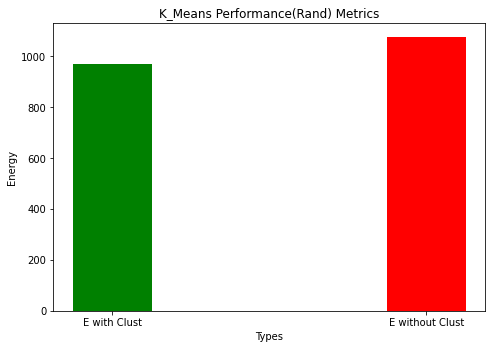

<Figure size 432x288 with 0 Axes>

In [53]:
# Plotting the energies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ens = ['E with Clust','E without Clust']
vals = [energy,energy_without]
ax.bar(ens,vals,width=0.25,color=('green','red'))
plt.xlabel("Types")
plt.ylabel("Energy")
plt.title('K_Means Performance(Rand) Metrics')
plt.show()
plt.savefig("../Performance/wsn_clust_kmeans_rand_perf.png")